In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [6]:
data = pd.read_csv('../Data/RELIANCE.csv', parse_dates=['Datetime'], index_col='Datetime')

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-01 09:15:00+05:30,2478.750000,2478.750000,2462.899902,2471.949951,2471.949951,0
2023-06-01 09:20:00+05:30,2472.350098,2472.350098,2466.050049,2467.350098,2467.350098,92104
2023-06-01 09:25:00+05:30,2467.750000,2467.949951,2465.000000,2466.050049,2466.050049,99773
2023-06-01 09:30:00+05:30,2466.050049,2474.149902,2465.050049,2473.699951,2473.699951,133507
2023-06-01 09:35:00+05:30,2473.500000,2476.899902,2473.000000,2476.899902,2476.899902,127370
...,...,...,...,...,...,...
2023-06-27 15:05:00+05:30,2497.649902,2498.199951,2496.300049,2497.899902,2497.899902,100182
2023-06-27 15:10:00+05:30,2497.899902,2498.000000,2496.850098,2497.500000,2497.500000,80847
2023-06-27 15:15:00+05:30,2497.449951,2497.500000,2495.199951,2495.750000,2495.750000,102686


<Axes: xlabel='Datetime'>

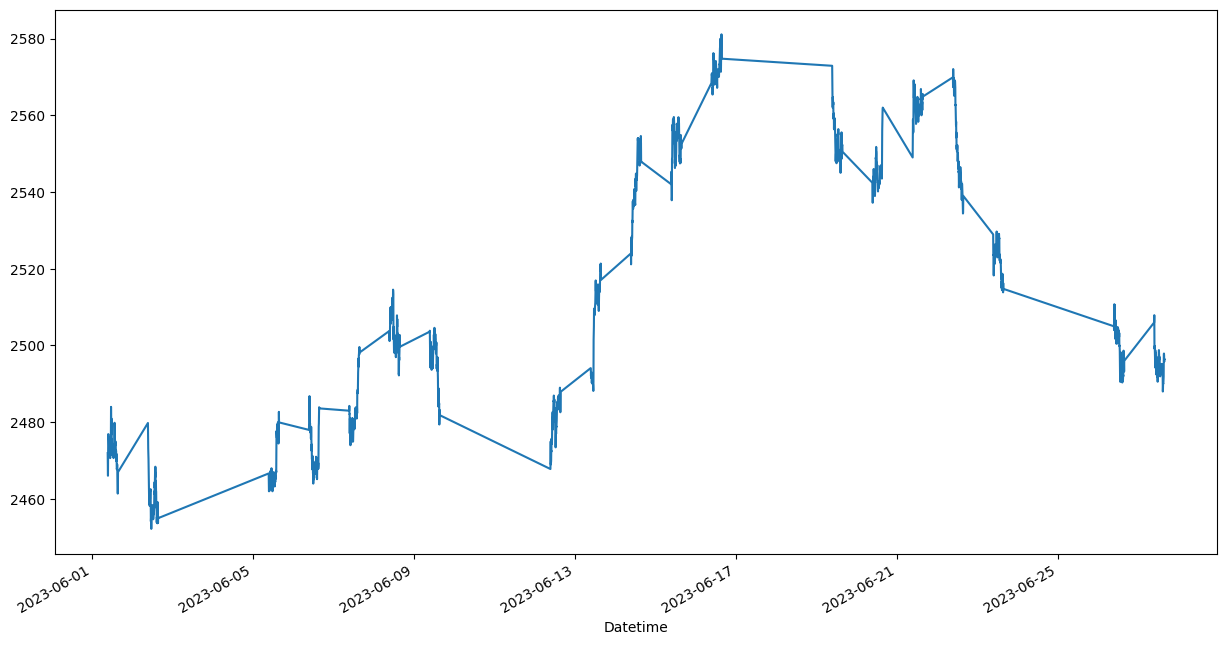

In [9]:
data.Close.plot(figsize=(15,8))

## GOLDEN CROSSOVER

20 sma cross 50 sma, Then buy signal and when 50 sma cross 20 sma the sell signal

In [13]:
data['20_SMA'] = data.Close.rolling(window = 20, min_periods = 20).mean()
data['50_SMA'] = data.Close.rolling(window = 50, min_periods = 50).mean()

In [14]:
data['Signal'] = 0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)

In [15]:
data['Position'] = data.Signal.diff()

In [29]:
data

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
Datetime,,,,,,,,,,
2023-06-01 09:15:00+05:30,2478.750000,2478.750000,2462.899902,2471.949951,2471.949951,0,NaN,NaN,0,NaN
2023-06-01 09:20:00+05:30,2472.350098,2472.350098,2466.050049,2467.350098,2467.350098,92104,NaN,NaN,0,0.0
2023-06-01 09:25:00+05:30,2467.750000,2467.949951,2465.000000,2466.050049,2466.050049,99773,NaN,NaN,0,0.0
2023-06-01 09:30:00+05:30,2466.050049,2474.149902,2465.050049,2473.699951,2473.699951,133507,NaN,NaN,0,0.0
2023-06-01 09:35:00+05:30,2473.500000,2476.899902,2473.000000,2476.899902,2476.899902,127370,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-06-27 15:05:00+05:30,2497.649902,2498.199951,2496.300049,2497.899902,2497.899902,100182,2493.259973,2494.182983,0,0.0
2023-06-27 15:10:00+05:30,2497.899902,2498.000000,2496.850098,2497.500000,2497.500000,80847,2493.434973,2494.269985,0,0.0
2023-06-27 15:15:00+05:30,2497.449951,2497.500000,2495.199951,2495.750000,2495.750000,102686,2493.529968,2494.347983,0,0.0


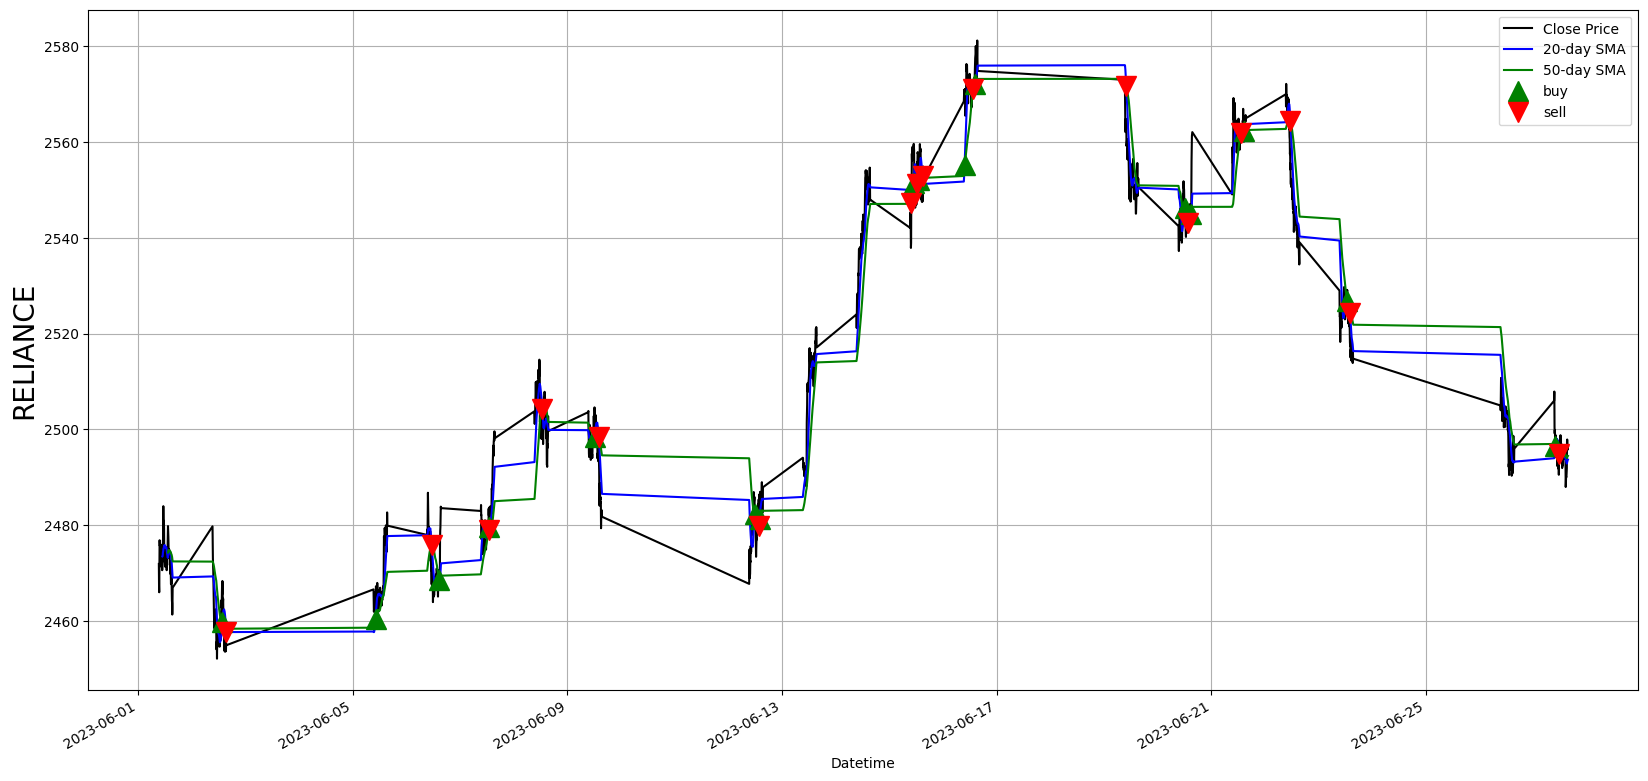

In [34]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
data.iloc[-1500:]['Close'].plot(color = 'k', label= 'Close Price')
data.iloc[-1500:]['20_SMA'].plot(color = 'b', label= '20-day SMA')
data.iloc[-1500:]['50_SMA'].plot(color = 'g', label= '50-day SMA')
# plot 'buy' signals
plt.plot(data.iloc[-1500:][data.iloc[-1500:]['Position'] == 1].index, 
         data.iloc[-1500:]['20_SMA'][data.iloc[-1500:]['Position'] ==1],
         '^', markersize=15, color='g', label='buy')
# plot 'sell' signals
plt.plot(data.iloc[-1500:][data.iloc[-1500:]['Position'] == -1].index, 
         data.iloc[-1500:]['20_SMA'][data.iloc[-1500:]['Position'] ==-1],
         'v', markersize=15, color='r', label='sell')

plt.ylabel('Price in Rupees', fontsize=15)
plt.ylabel('DateTime', fontsize=15)
plt.ylabel('RELIANCE', fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [36]:
df_pos = data.iloc[-1500:][(data.iloc[-1500:]['Position'] == 1) | (data['Position'] == -1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------------+---------+------------+
| Datetime                  |   Close | Position   |
|---------------------------+---------+------------|
| 2023-06-02 13:40:00+05:30 | 2468.4  | Buy        |
| 2023-06-02 15:25:00+05:30 | 2455    | Sell       |
| 2023-06-05 10:10:00+05:30 | 2465.6  | Buy        |
| 2023-06-06 11:15:00+05:30 | 2467.7  | Sell       |
| 2023-06-06 14:45:00+05:30 | 2469.4  | Buy        |
| 2023-06-07 12:50:00+05:30 | 2482.05 | Sell       |
| 2023-06-07 13:05:00+05:30 | 2482.5  | Buy        |
| 2023-06-08 12:45:00+05:30 | 2499.1  | Sell       |
| 2023-06-09 12:05:00+05:30 | 2504.6  | Buy        |
| 2023-06-09 14:00:00+05:30 | 2494.25 | Sell       |
| 2023-06-12 11:40:00+05:30 | 2485.55 | Buy        |
| 2023-06-12 13:35:00+05:30 | 2483.45 | Sell       |
| 2023-06-12 13:55:00+05:30 | 2485    | Buy        |
| 2023-06-15 09:40:00+05:30 | 2538.9  | Sell       |
| 2023-06-15 10:50:00+05:30 | 2559.55 | Buy        |
| 2023-06-15 12:30:00+05:30 | 2555.65 | Sell  

In [37]:
def GoldenCrossverSignal(name, data_point):
    path = f'../Data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Datetime'], index_col='Datetime')
    data['20_SMA'] = data.Close.rolling(window=20, min_periods=20).mean()
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=50).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-data_point:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-data_point:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
    data.iloc[-data_point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == 1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == -1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('DateTime', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

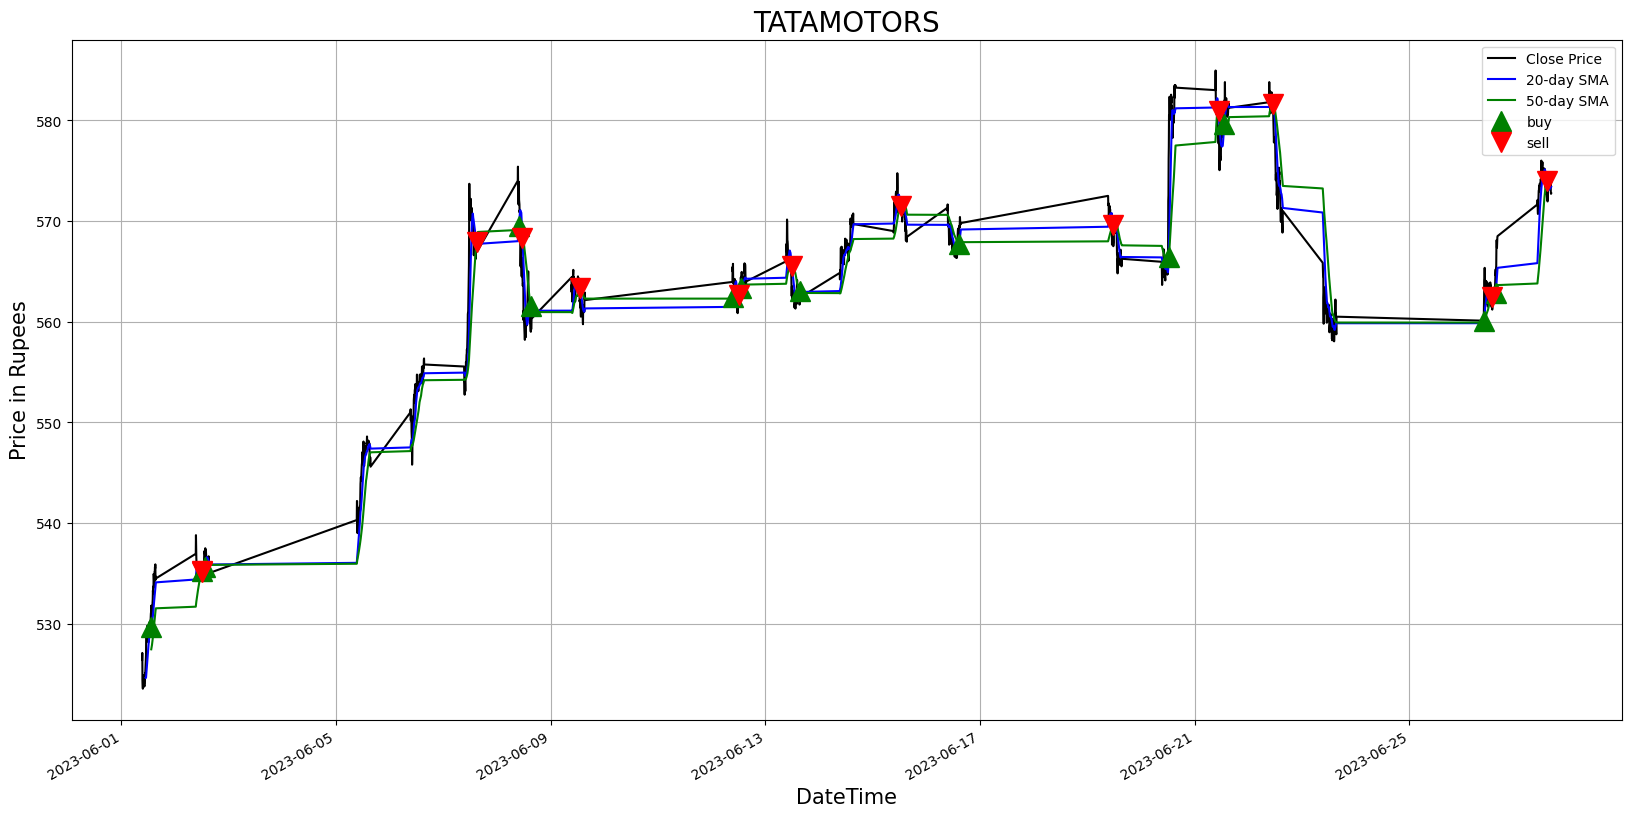

+---------------------------+---------+------------+
| Datetime                  |   Close | Position   |
|---------------------------+---------+------------|
| 2023-06-01 13:20:00+05:30 |  531.8  | Buy        |
| 2023-06-02 11:55:00+05:30 |  534.9  | Sell       |
| 2023-06-02 12:00:00+05:30 |  535.55 | Buy        |
| 2023-06-02 12:05:00+05:30 |  535.25 | Sell       |
| 2023-06-02 13:15:00+05:30 |  537.2  | Buy        |
| 2023-06-07 14:50:00+05:30 |  567    | Sell       |
| 2023-06-08 09:45:00+05:30 |  573.9  | Buy        |
| 2023-06-08 11:20:00+05:30 |  564.6  | Sell       |
| 2023-06-08 15:00:00+05:30 |  559.15 | Buy        |
| 2023-06-09 13:10:00+05:30 |  561.4  | Sell       |
| 2023-06-12 09:40:00+05:30 |  563.8  | Buy        |
| 2023-06-12 12:00:00+05:30 |  563.05 | Sell       |
| 2023-06-12 13:15:00+05:30 |  564.65 | Buy        |
| 2023-06-13 11:50:00+05:30 |  563.5  | Sell       |
| 2023-06-13 15:15:00+05:30 |  561.7  | Buy        |
| 2023-06-15 12:50:00+05:30 |  571.35 | Sell  

In [38]:
GoldenCrossverSignal('TATAMOTORS', 1500)